# VFT Preprocessing

## Library settings

In [56]:
import os, sys, random, time, glob
import urllib
import librosa
import librosa.display
import sklearn
import torch
import torchvision
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
from PIL import Image
from tqdm import tqdm

In [3]:
directory = os.getcwd()
print("Current working directory is:", directory)

Current working directory is: C:\Users\user\Jupyter\ML_practices\projects\FNIRS_VFT


## MFCC convert trials

### Previous Trials

In [26]:
audio_path = "E:/RESEARCH/BRAIN/research_data/VFT/1/VerbalFluencyTest-001-1Stimulus-2.wav"

In [79]:
sample_rate = 22050

x = librosa.load(audio_path, sample_rate)[0]
S = librosa.feature.melspectrogram(x, sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=5)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

<ipython-input-79-639e063670ed>:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x = librosa.load(audio_path, sample_rate)[0]
<ipython-input-79-639e063670ed>:4: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.8005371e-03
  9.6130371e-04 -4.7302246e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(x, sr=sample_rate, n_mels=128)


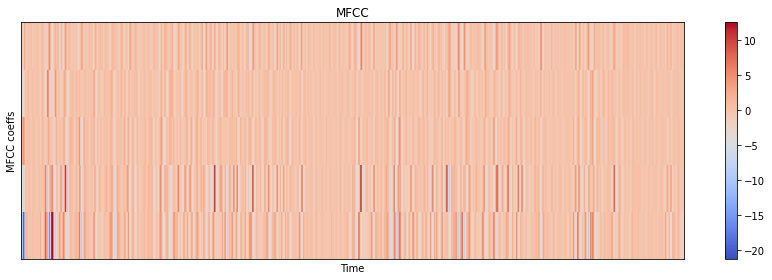

In [80]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### New Trials

In [81]:
x, sr = librosa.load(audio_path) ## sr:Sample Rate
print("Time series x is:", x, "\nSampling rate sr is:", sr)

Time series x is: [ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.8005371e-03
  9.6130371e-04 -4.7302246e-04] 
Sampling rate sr is: 22050


* Checking waveform

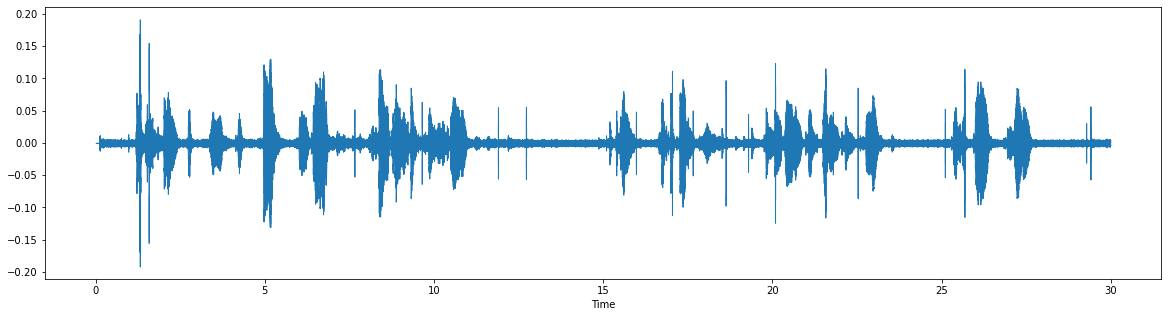

In [38]:
plt.figure(figsize = (20,5))
librosa.display.waveshow(x, sr = sr)

* Spectrogram

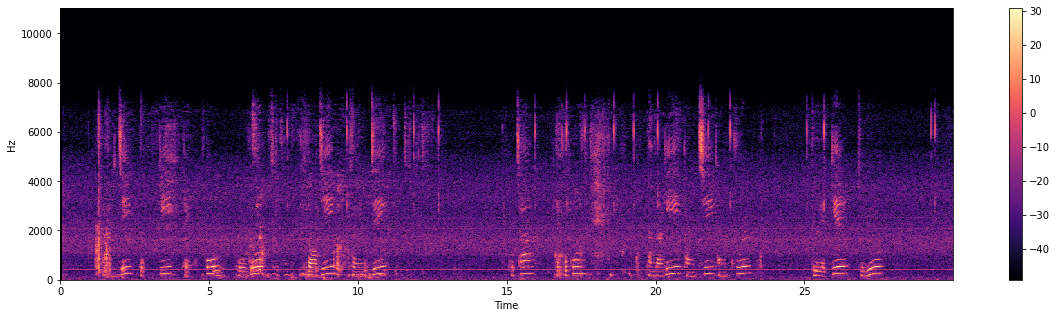

In [37]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

* Log frequency axis

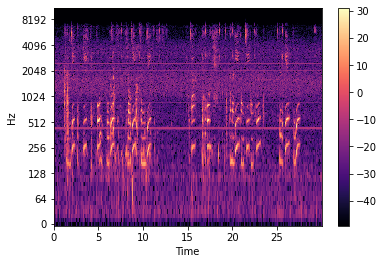

In [39]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

* Zero Crossing Rate

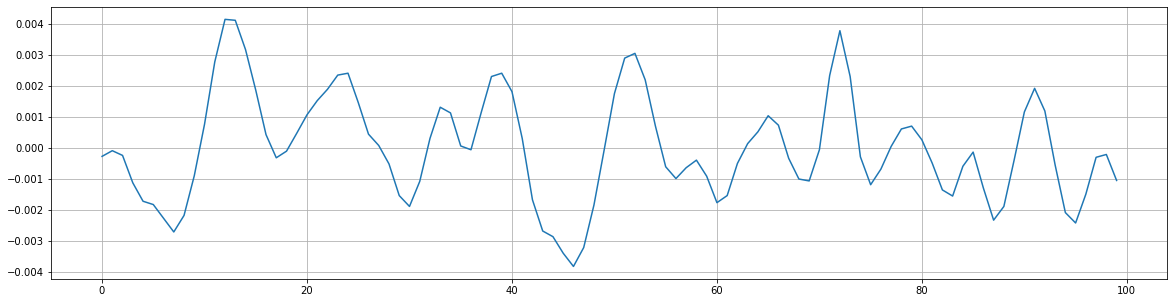

In [40]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [41]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [42]:
print(sum(zero_crossings))

18


* Spectral Centroid

In [43]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

<ipython-input-43-eed9404c0e35>:1: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.8005371e-03
  9.6130371e-04 -4.7302246e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


(1292,)

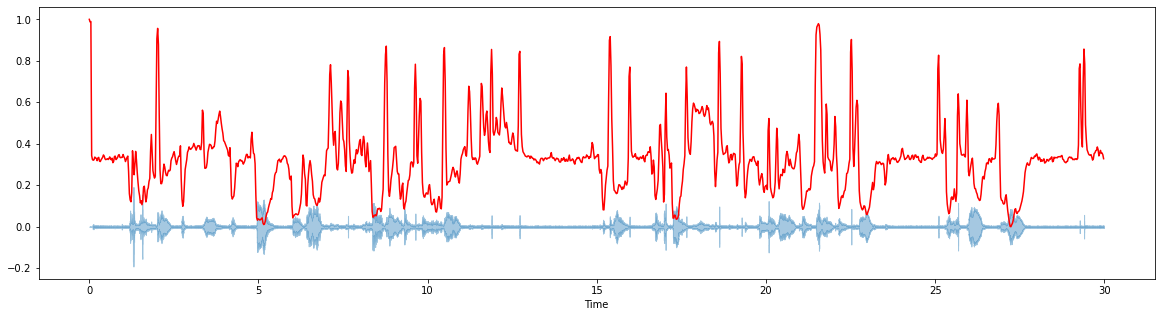

In [47]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

* Spectral Rolloff

<ipython-input-48-44c3c60a1d86>:2: FutureWarning: Pass y=[0.01       0.00998474 0.01       ... 0.01180054 0.0109613  0.00952698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


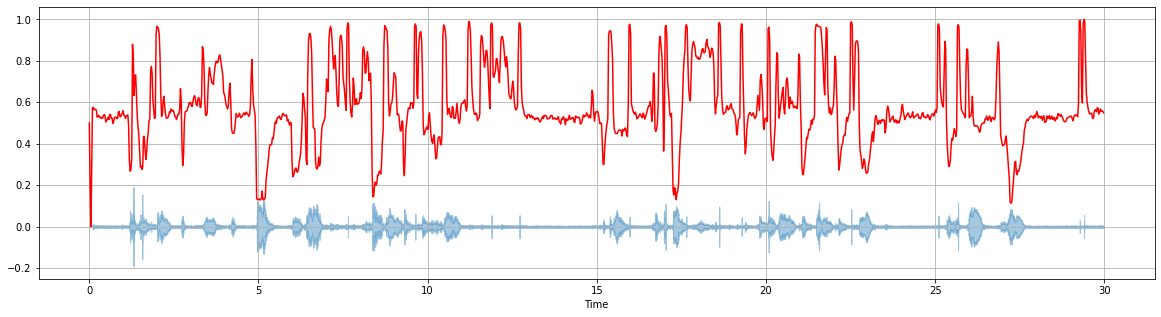

In [48]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

* MFCC

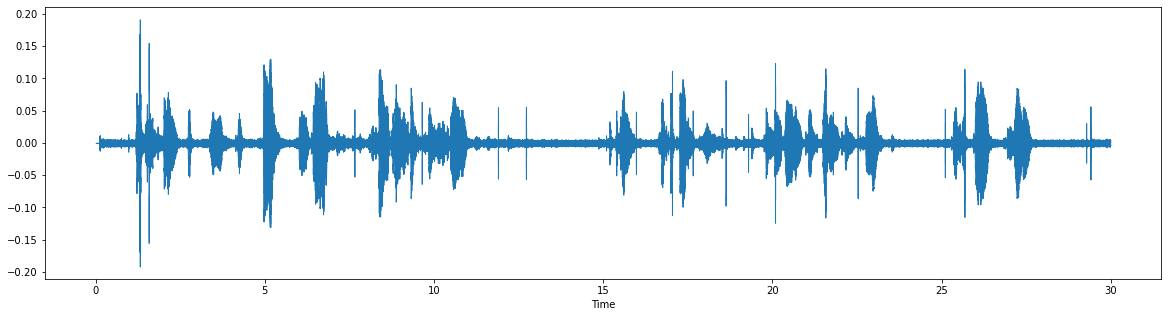

In [49]:
plt.figure(figsize=(20,5))
x, fs = librosa.load(audio_path)
librosa.display.waveshow(x, sr=sr)

(20, 1292)


<ipython-input-50-8218a27a2508>:3: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.8005371e-03
  9.6130371e-04 -4.7302246e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


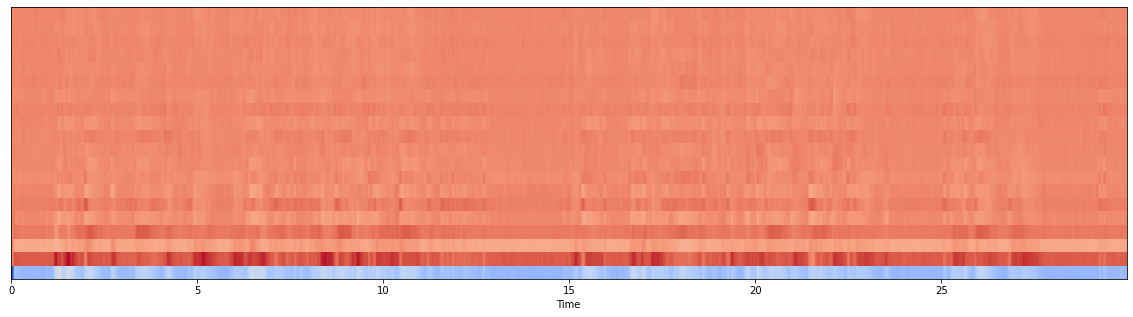

In [50]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

* Feature Scaling

In [51]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.0000000e+00 -1.0333932e-08  2.9525520e-09  5.9051040e-09
  1.4762760e-09 -5.9051040e-09 -1.4762760e-08  1.1810208e-08
  0.0000000e+00  0.0000000e+00 -2.9525520e-09  0.0000000e+00
  0.0000000e+00  1.4762760e-09  0.0000000e+00  8.8576559e-09
 -2.9525520e-09 -2.9525520e-09  1.1810208e-08  8.8576559e-09]
[1.        0.9999999 1.0000002 1.0000002 1.        1.        1.0000001
 0.9999999 1.        1.0000002 1.0000001 1.        0.9999999 1.0000002
 0.9999999 1.        1.        0.9999999 1.        1.       ]


C:\Users\user\anaconda3\envs\mlprac2\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\user\anaconda3\envs\mlprac2\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


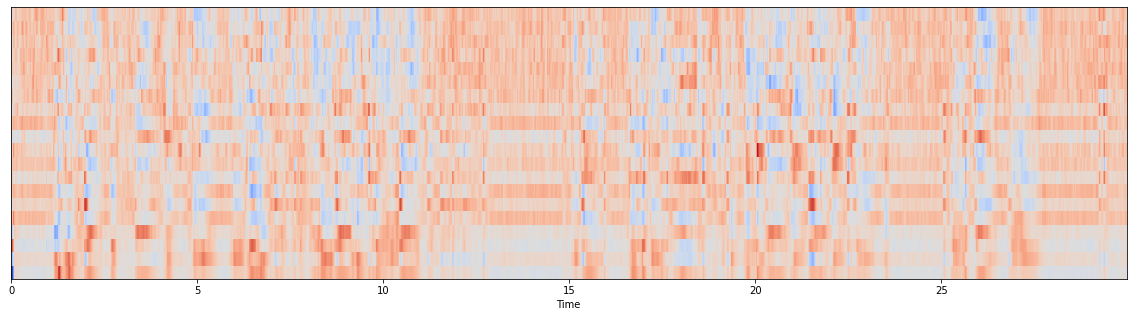

In [53]:
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

* Chroma Frequencies

In [57]:
# Loadign the file
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

<ipython-input-59-a012f1bc38c5>:2: FutureWarning: Pass y=[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.8005371e-03
  9.6130371e-04 -4.7302246e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


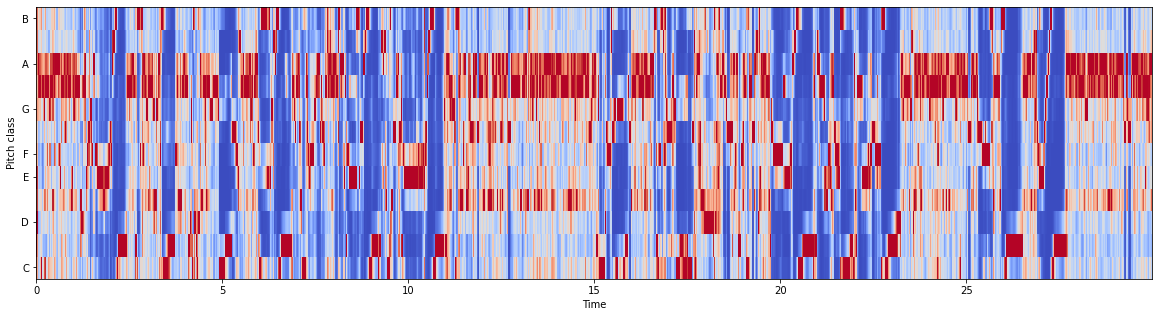

In [59]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

---

## Dataset settings

In [15]:
vft_dir = "E:/RESEARCH/BRAIN/research_data/VFT/"
vft_file_names = os.listdir(vft_dir)

In [ ]:
## removing unnecessary files except for the wave file
def removing_unnec_files(path):
    i = 1
    for i in range(0, len(os.listdir(path))):
        [os.remove(file) for file in glob.glob(path + str(i) + '/*.xml')]
        [os.remove(file) for file in glob.glob(path + str(i) + '/*.edat3')]
        [os.remove(file) for file in glob.glob(path + str(i) + '/*.txt')]
        i += 1

In [ ]:
removing_unnec_files(vft_dir)

In [18]:
## removing all files including "BaseLine" 
def removing_baseline(path):
    i = 1
    for i in range(0, len(os.listdir(path))):
        [os.remove(file) for file in glob.glob(path + str(i) + '/*BaseLine*')]
        i += 1

In [17]:
removing_baseline(vft_dir)